In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings

from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

In [84]:
dict1={
  "4.2" : "2012-6-27 00:00:00" ,  
"4.3" : "2013-6-26 20:00:00" ,
"4.4" :  "2014-6-25 12:15:00" ,
"4.5" : "2015-6-24 20:00:00" ,
"4.6" :"2016-6-22 11:00:00",
"4.7" :  "2017-6-28 09:50:00",
"4.8" :  "2018-6-27 00:00:00"

}

In [85]:
arr=[
    "26-6-2013 20:00:00" ,
 "25-6-2014 12:15:00" ,
 "24-6-2015 20:00:00" ,
"22-6-2016 11:00:00",
  "28-6-2017 09:50:00",
  "27-6-2018 00:00:00",
 "27-6-2019 00:00:00"
]

In [86]:
def keepVal(activity):
    if activity=='NEW'or activity=='Assignee':
        return 1
    return 0

In [87]:
def keepVal2(activity):
    if activity=='Assignee'or activity=='FIXED':
        return 1
    return 0

In [88]:
#read the CSV file
df=pd.read_csv('db\\ECF.csv')

df['creation_ts']=pd.to_datetime(df['creation_ts'])

In [89]:
#df = df[df['creation_ts']>='01-01-2013 00:00:00']

In [90]:
allD=df

In [91]:
df['keep']=df.apply(lambda x : keepVal(x['activity']), axis=1)
df = df[df['keep']==1]
df = df[['When', 'Who', 'activity', 'bug_id', 'bug_severity', 'bug_status',
       'creation_ts', 'resolution', 'version']]

In [92]:
df1=df
df2=df

In [93]:
df2=df2.groupby(by='bug_id', as_index=False).agg({'activity': pd.Series.nunique})
df2 = df2[df2['activity']!=2]

In [94]:
dfList = df2['bug_id'].tolist()

In [95]:
gap =allD[~allD.bug_id.isin(dfList)]

In [96]:
df=gap

In [97]:
df['When']=pd.to_datetime(df['When'])
df['creation_ts']=pd.to_datetime(df['creation_ts'])

C:\Users\zeinab\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\zeinab\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [98]:
tData=pd.DataFrame()
id_before_release=0
id_after_release=0
id_RBRB=0
id_RBFB=0
id_RBRA=0
id_RBFA=0
id_RARA=0
id_RAFA=0
c=0
for x in dict1:
    data=pd.DataFrame()
    #print(dict[x])
    start_date = dict1[x]
   
    #version= x
    versionD= x
    version='^'+versionD
   # print(x,dict[x])
  #mask = (df['creation_ts'] > start_date) & (df['creation_ts'] <= end_date) & (("4.4.1"==df['version'])  | ("4.4"==df['version']))
    #mask = (df['creation_ts'] > start_date) & (df['creation_ts'] <= end_date) & ("4.4"==df['version'])
    mask= (df.version.str.contains(version, regex=True))  
    #the bug before release 
    maskp = (df.version.str.contains(version, regex=True))  & (df['creation_ts'] < start_date)
    #the bug after release 
    maskpp = (df.version.str.contains(version, regex=True))  & (df['creation_ts'] >= start_date) & (df['creation_ts'] < arr[c])
     


    #the bug created and resolved & before release 
    mask1 = (df['When'] < start_date) & (df['creation_ts'] <= start_date) & (df.version.str.contains(version, regex=True)) & ("RESOLVED"==df['activity']) 
    #the bug created and fixed before release 
    mask2 = (df['When'] < start_date) & (df['creation_ts'] <= start_date) & (df.version.str.contains(version, regex=True)) & ("RESOLVED"==df['activity'])  & ("FIXED"==df['resolution'])

    #the bug created before release and resolved  after release 
    mask3 = (df['When'] > start_date) & (df['creation_ts'] <= start_date) & (df.version.str.contains(version, regex=True)) & ("RESOLVED"==df['activity'])
    #the bug created before release and fixed after release 
    mask4 = (df['When'] > start_date) & (df['creation_ts'] <= start_date) & (df.version.str.contains(version, regex=True)) & ("RESOLVED"==df['activity']) & ("FIXED"==df['resolution']) 
    #the bug created after release  and resolved
    mask5 = (df['creation_ts'] >= start_date) & (df['creation_ts'] < arr[c]) & (df.version.str.contains(version, regex=True)) & ("RESOLVED"==df['activity']) 
    #the bug created after release  and fixed 
    mask6 = (df['creation_ts'] >= start_date) & (df['creation_ts'] <arr[c]) & (df.version.str.contains(version, regex=True)) & ("RESOLVED"==df['activity']) & ("FIXED"==df['resolution'])

    c=c+1
    dff = df.loc[mask]
    dffp = df.loc[maskp]
    dffpp = df.loc[maskpp]
    dff1 = df.loc[mask1]
    dff2 = df.loc[mask2]
    dff3 = df.loc[mask3]
    dff4 = df.loc[mask4]
    dff5 = df.loc[mask5]
    dff6 = df.loc[mask6]
    id_before_release=dffp.bug_id.unique()
    id_after_release=dffpp.bug_id.unique()
    id_RBRB=dff1.bug_id.unique()
    id_RBFB=dff2.bug_id.unique()
    id_RBRA=dff3.bug_id.unique()
    id_RBFA=dff4.bug_id.unique()
    id_RARA=dff5.bug_id.unique()
    id_RAFA=dff6.bug_id.unique()
    
    TOTAL=len(dff.bug_id.unique())
    data=pd.DataFrame({"version": [versionD] , "total":[ TOTAL] , 'id_RBRB':[id_RBRB]
   , 'id_RBFB':[id_RBFB]
   , 'id_RBRA':[id_RBRA]
   ,'id_RBFA':[id_RBFA]
   , 'id_RARA':[id_RARA]
   , 'id_RAFA':[id_RAFA]
            
   })

    tData=tData.append(data)

In [99]:
tData

,version,total,id_RBRB,id_RBFB,id_RBRA,id_RBFA,id_RARA,id_RAFA
0,4.2,3209,"[353625, 355371, 355524, 355293, 356323, 35538...","[353625, 355371, 355524, 355380, 356636, 35628...","[381684, 383044, 378444, 382878, 320854, 36203...","[381684, 383044, 378444, 382878, 376257, 37796...","[383715, 383824, 383978, 384677, 384865, 38519...","[383715, 383824, 384677, 385192, 384276, 38524..."
0,4.3,2690,"[386909, 388584, 389592, 388563, 388184, 38948...","[386909, 389287, 390735, 390734, 390569, 39068...","[401312, 394478, 393171, 400374, 409854, 39354...","[401312, 393171, 400374, 401015, 401632, 40553...","[422949, 424274, 436645, 417026, 432318, 42541...","[424274, 436645, 417026, 432318, 425413, 41951..."
0,4.4,3465,"[425646, 426527, 422027, 417676, 429505, 42993...","[426527, 429505, 429932, 430127, 436301, 43117...","[435504, 431845, 436469, 417441, 437005, 43609...","[431845, 437005, 436091, 432466, 420479, 43430...","[463455, 461554, 448916, 464705, 459544, 45405...","[448916, 464705, 454056, 442285, 440300, 44068..."
0,4.5,2262,"[462083, 455945, 451349, 462201, 454590, 45707...","[462083, 455945, 451349, 462201, 454590, 45707...","[444477, 466920, 463720, 469537, 470542, 46649...","[463720, 469537, 470542, 466499, 464081, 44621...","[490968, 478708, 477677, 477527, 475115, 47554...","[490968, 478708, 477677, 477527, 478242, 48465..."
0,4.6,2261,"[484992, 485084, 485097, 479855, 485068, 48337...","[484992, 485084, 479855, 483375, 485139, 48469...","[475547, 482851, 496316, 495241, 495904, 49563...","[482851, 496316, 495241, 495904, 495634, 48757...","[500061, 515233, 496984, 496902, 497023, 49704...","[500061, 515233, 496984, 497023, 497046, 49704..."
0,4.7,2679,"[496868, 497013, 496756, 497039, 497052, 49708...","[496868, 497013, 496756, 497039, 497052, 49708...","[514533, 515092, 518080, 501720, 517161, 51855...","[514533, 515092, 518080, 501720, 517161, 51855...","[530131, 519992, 532529, 519026, 519032, 51905...","[530131, 519992, 532529, 519026, 519032, 51905..."
0,4.8,1605,"[518772, 518956, 518431, 516533, 519714, 51935...","[518772, 518956, 518431, 516533, 519714, 51935...","[528766, 536308, 526955, 534123, 527052, 53083...","[528766, 536308, 526955, 534123, 527052, 53083...","[543125, 538433, 540032, 539279, 539922, 54022...","[543125, 538433, 540032, 539279, 539922, 54022..."


In [101]:
for index, row in tData.iterrows():
    df3=df[df.bug_id.isin(row['id_RBRB'])]
   # print(len(row['id_RAFA']))
    version=row['version']
    df3['keep']=df3.apply(lambda x : keepVal(x['activity']), axis=1)
    df3 = df3[df3['keep']==1]
    df3 = df3[['When', 'activity', 'bug_id']]

    df3['When']=pd.to_datetime(df3['When'])
    #print (df3.groupby('bug_id').groups)
    df3=df3.groupby(['bug_id','activity'])['When'].min().reset_index()
    df3['diff'] = df3.groupby('bug_id')['When'].transform(lambda x: (x.max()-x.min()).days)
    df3=df3.groupby('bug_id').first().reset_index()
    df3= df3[['bug_id',
     'When',
     'diff']]
    df3['done'] = '1'
    df3.to_csv('RQ3\\Eclipse-RBRB_'+str(version)+'.csv',index=False)
    
    
    
    df4=df[df.bug_id.isin(row['id_RARA'])]
   # print(len(row['id_RAFA']))
    df4['keep']=df4.apply(lambda x : keepVal(x['activity']), axis=1)
    df4 = df4[df4['keep']==1]
    df4 = df4[['When', 'activity', 'bug_id']]

    df4['When']=pd.to_datetime(df4['When'])
    #print (df3.groupby('bug_id').groups)
    df4=df4.groupby(['bug_id','activity'])['When'].min().reset_index()
    df4['diff'] = df4.groupby('bug_id')['When'].transform(lambda x: (x.max()-x.min()).days)
    df4=df4.groupby('bug_id').first().reset_index()
    df4= df4[['bug_id',
     'When',
     'diff']]
    df4['done'] = '1'
    df4.to_csv('RQ3\\Eclipse-RARA_'+str(version)+'.csv',index=False)
    
   # print (row['id_RAFA'], row['id_RARA'])
    #break

#fg=tData[0]

C:\Users\zeinab\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\zeinab\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


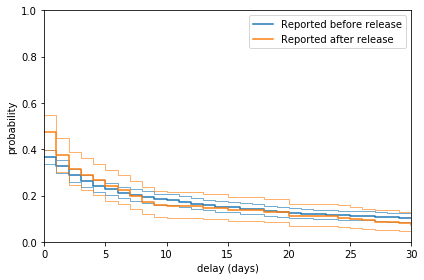

In [109]:
kmf = KaplanMeierFitter()
draft_1 = pd.read_csv('RQ3\\Eclipse-RBRB_4.2.csv')
draft0 = pd.read_csv('RQ3\\Eclipse-RARA_4.2.csv')
data0=['4.2',draft_1,draft0]
draft1 = pd.read_csv('RQ3\\Eclipse-RBRB_4.3.csv')
draft2 = pd.read_csv('RQ3\\Eclipse-RARA_4.3.csv')
data1=['4.3',draft1,draft2]
draft3 = pd.read_csv('RQ3\\Eclipse-RBRB_4.4.csv')
draft4 = pd.read_csv('RQ3\\Eclipse-RARA_4.4.csv')
data2=['4.4',draft3,draft4]
draft5 = pd.read_csv('RQ3\\Eclipse-RBRB_4.5.csv')
draft6 = pd.read_csv('RQ3\\Eclipse-RARA_4.5.csv')
data3=['4.5',draft5,draft6]
draft7 = pd.read_csv('RQ3\\Eclipse-RBRB_4.6.csv')
draft8 = pd.read_csv('RQ3\\Eclipse-RARA_4.6.csv')
data4=['4.6',draft7,draft8]
draft9 = pd.read_csv('RQ3\\Eclipse-RBRB_4.7.csv')
draft10 = pd.read_csv('RQ3\\Eclipse-RARA_4.7.csv')
data5=['4.7',draft9,draft10]
draft11 = pd.read_csv('RQ3\\Eclipse-RBRB_4.8.csv')
draft12 = pd.read_csv('RQ3\\Eclipse-RARA_4.8.csv')
data6=['4.8',draft11,draft12]
allf=[data0,data1,data2,data3,data4,data5,data6]
time=['Reported before release','Reported after release']
c=0
#for i,file in enumerate(allf):
ax = plt.subplot(1, 1, 1)
file=data6
for j,dat in enumerate(file):
    if j==0:
        version=dat
    else:
        T = dat["diff"]
        E = dat["done"]
        kmf.fit( T, E, label=time[j-1])
        kmf.plot(ax=ax, ci_force_lines=True)
        ax.set_xlabel("delay (days)")
        ax.set_ylabel("probability")
c=c+1
#plt.title('release '+version)
plt.xlim(0, 30)
plt.ylim(0, 1)
    
    #if i==2:
        #break
        #plt.ylabel('triaging time over releases')
plt.savefig('xrq2t'+version+'.pdf')
plt.tight_layout( )




In [66]:
allf=[data0,data1,data2,data3,data4,data5,data6]
pData=pd.DataFrame()
T=[None] * 2
E=[None] * 2
results=[None] * 7
for i,file in enumerate(allf):
    k=0
    for j,dat in enumerate(file):
        if j==0:
            version=dat
        else:
            T[k] = dat["diff"]
            E[k] = dat["done"]
            k=k+1
    results[i] = logrank_test(T[0], T[1], E[0], E[1], alpha=.95).p_value
    pDat=pd.DataFrame({'version': [version] , 'p':[results[i]] })

    #print(version)
    pData=pData.append(pDat)
 


In [67]:
pData= pData[['version' , 'p']]
pData

,version,p
0,4.2,1.246320e-02
0,4.3,2.138443e-05
0,4.4,2.216976e-02
0,4.5,1.354571e-28
0,4.6,4.936438e-04
0,4.7,1.473031e-02
0,4.8,8.360565e-01


In [72]:
xpData= pData[pData['p']<0.01]